In [466]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## 线性回归
1. 构造数据
2. 定义取数函数（小批量梯度下降需要随机取数）
2. 定义损失函数
3. 定义优化函数
4. 定义预测模型 $y=WX+b$
5. 进行多轮训练
6. 训练效果检测

### 构造数据
构造一个线性数据集，假设有两个变量
$y = w1 * x1 + w2 * x2 + b$

In [569]:
W = torch.tensor([5., 10])
b = 4.2
X = torch.normal(0, 1, (1000, 2))
noise = torch.normal(1, 0.1, (1, 1))
y = torch.matmul(X, W.reshape(2, 1)) + b
y +=  torch.normal(0, 0.01, y.shape)
print(X[0], y[0])

tensor([-1.3808,  0.0918]) tensor([-1.7768])


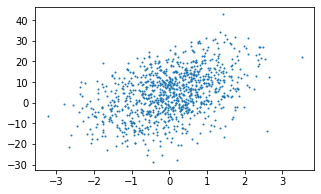

In [566]:
# 画图验证下y和x1之间是线性关系
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(X[:, 0], y, s=1)

### 定义损失函数
平方损失 $loss = \frac{1}{2} * (y - yhat) ^ 2$

In [553]:
def loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 定义优化函数
梯度下降法向参数的真实值逼近

In [554]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 定义取数函数
小批量梯度下降法需要从数据集里随机取小批量的数据来进行训练

In [555]:
def get_data(data, res, batch_size):
    idx = list(range(len(data)))
    np.random.shuffle(idx)
    for i in range(0, len(idx), batch_size):
        indices = idx[i:i + batch_size]
        yield data[indices], res[indices]

### 定义模型

In [556]:
def linear_reg(X, W, b):
    return torch.matmul(X, W) + b

### 定义训练训练函数
求y_hat，然后调用损失函数，对参数求导

In [521]:
# 注意下两个train函数，本质的区别是 第一个只取3次值
# 第二个train 所有的值取一遍，循环三遍
def train(data, res, W, b, lr, epochs, batch_size):
    train_iter = get_data(data, res, batch_size)
    for i in range(epochs):
        train_data, res_data = next(train_iter)
        l = loss(linear_reg(train_data, W, b), res_data)
        l.sum().backward()
        sgd([W, b], lr, batch_size)
        print(train_data, res_data)
        with torch.no_grad():
            train_l = loss(linear_reg(train_data, W, b), res_data)
            print('epoch', i + 1, 'loss:', train_l.mean())

In [557]:
def train(data, res, W, b, lr, epochs, batch_size):
    for i in range(epochs):
        for train_data, res_data in get_data(data, res, batch_size):
            l = loss(linear_reg(train_data, W, b), res_data)
            l.sum().backward()
            sgd([W, b], lr, batch_size)
        with torch.no_grad():
            train_l = loss(linear_reg(train_data, W, b), res_data)
            print(f'epoch, {i + 1}, loss:, {float(train_l.mean()):f}')

### 初始化变量开始训练

In [572]:
train_W = torch.normal(1, 0.1, (2, 1), requires_grad=True)
train_b = torch.zeros(1, requires_grad=True)
lr = 0.03
epochs = 3
batch_size = 10
train(X, y, train_W, train_b, lr, epochs, batch_size)

print(train_W.detach().numpy(), train_b.detach().numpy())


epoch, 1, loss:, 0.036298
epoch, 2, loss:, 0.000150
epoch, 3, loss:, 0.000046
[[4.9994674]
 [9.999225 ]] [4.1995792]


### 和真实结果比较

In [465]:

test_iter = get_data(X, y, batch_size)
test_data, test_res = next(test_iter)
with torch.no_grad():
    y_hat = linear_reg(test_data, train_W, train_b)
    l = loss(test_res, y_hat) / batch_size
    print('loss: ', l.mean())

loss:  tensor(1.1112)
